<a href="https://colab.research.google.com/github/varunk04/Deep_learning_with_Tensorflow/blob/main/01_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Intro to Regression with NN in tensorflow:

## Creating data to view and fit:

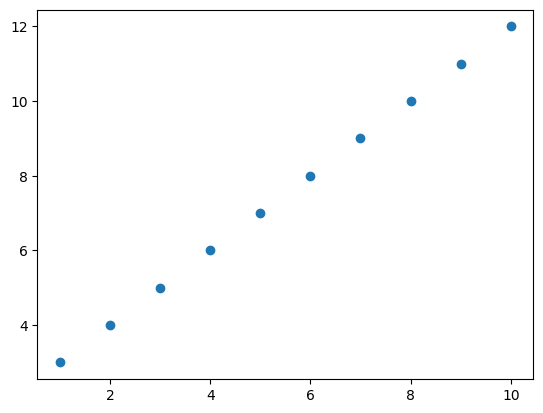

In [ ]:
# Create the fearures :

X = np.array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])

# Create lables:
y = np.array([3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0])

plt.scatter(X,y)

In [ ]:
y == X + 2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

This is the relationship our neural network must learn.

y = mX + c ==> y = X + 2

### Inputs and output shape:

In [ ]:
input_shape = X.shape
output_shape = y.shape

input_shape,output_shape

((10,), (10,))

HMMM! this is not correct since we have to predict only one value of y by inputting one value of X

In [ ]:
X[0],y[0]

(1.0, 3.0)

In [ ]:
X[1],y[1]

(2.0, 4.0)

We want out input and output in thi sense

In [ ]:
# Turn our NumPy array to tensors:

X = tf.constant(tf.cast(X, dtype = tf.float32))
y = tf.constant(tf.cast(y, dtype = tf.float32))

X,y

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.], dtype=float32)>)

## Steps in modelling with tensorFlow:

1. Creating the model - define Input abd Output layer, as well as the hidden layers of a deep learning model.
2. Compiling the model - Define the loss function,optimizer and Evaluation metrics.
3. Fitting the model - Letting the model to try the pattern.

In [ ]:
# setting random seed.

tf.random.set_seed(42)

# 1. creating a model using the sequential API:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

# 2. complie the model:
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

#3. Fit the model:
model.fit(tf.expand_dims(X,axis = -1) , y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 3.6723 - mae: 3.6723
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 3.3598 - mae: 3.3598
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 3.0473 - mae: 3.0473
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 2.7348 - mae: 2.7348
Epoch 5/5
1/1 [==============================] - 0s 24ms/step - loss: 2.4223 - mae: 2.4223


In [ ]:
# Check out X and y:

X,y

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.], dtype=float32)>)

In [ ]:
model.predict([20.0])

1/1 [==============================] - 0s 242ms/step


array([[19.468908]], dtype=float32)

## Improving the model:

We can improve model by altering the steps in creating the model.

1. Creating a model - We might increase no. of layers and add a activation function in each layer.

2. Compiling model: We might change the type of optimizer or change the learning rate.

3. Fitting a model: Increase the no. of Epochs, and provide addtional training data along side the evaluation model.

In [ ]:
# Lets rebuild the model:

# 1. Create the model:

model1 = tf.keras.Sequential(
    [
    tf.keras.layers.Dense(1)
    ]
)

# 2. compile the model:

model1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae']
              )

# 3. fit the model:

model1.fit(tf.expand_dims(X, axis = -1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 672ms/step - loss: 7.4614 - mae: 7.4614
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 7.1489 - mae: 7.1489
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8364 - mae: 6.8364
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 6.5239 - mae: 6.5239
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 6.2114 - mae: 6.2114
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 5.8989 - mae: 5.8989
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 5.5864 - mae: 5.5864
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 5.2739 - mae: 5.2739
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 4.9614 - mae: 4.9614
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 4.6489 - mae: 4.6489
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - l

In [ ]:
model1.predict([20.0])

1/1 [==============================] - 0s 159ms/step


array([[24.498487]], dtype=float32)

In [ ]:
# Lets make another change to the model:

# 1. Create the model:

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# 2. complie the model:

model2.compile(loss = 'mae',
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

# 3. fit the model:

model2.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 8.7131 - mae: 8.7131
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 8.1927 - mae: 8.1927
Epoch 3/100
1/1 [==============================] - 0s 29ms/step - loss: 7.6910 - mae: 7.6910
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 7.2042 - mae: 7.2042
Epoch 5/100
1/1 [==============================] - 0s 42ms/step - loss: 6.7301 - mae: 6.7301
Epoch 6/100
1/1 [==============================] - 0s 49ms/step - loss: 6.2532 - mae: 6.2532
Epoch 7/100
1/1 [==============================] - 0s 54ms/step - loss: 5.7646 - mae: 5.7646
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 5.2654 - mae: 5.2654
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 4.7424 - mae: 4.7424
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 4.1891 - mae: 4.1891
Epoch 11/100
1/1 [==============================] - 0s 22ms/step - loss

In [ ]:
model2.predict([20.0])

1/1 [==============================] - 0s 74ms/step


array([[23.184147]], dtype=float32)

 * First model was very basic with only  1 layer and 1 neuron.
 * Second model we changed the number of epochs that is we increased the no. of epochs which significantly improved our model.
 * In our thrid modle we added a extra layer and it further improved our models prediction power

### Differnt ways to increase the model:

1. Adding the layers
2. Increase the number of hidden units or neurons.
3. change the activation functions
4. change the optimizer function
5. chnage the number of epochs
6. change the leraning rate.

## Evaluating the model:

One of the best way id to **VISUALIZE**

In [ ]:
# Lets make the biger dataset:

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

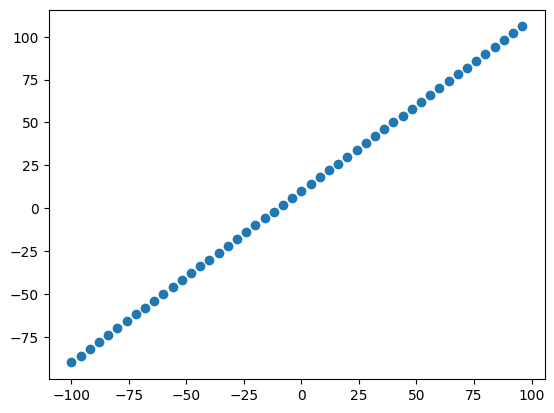

In [ ]:
# Lets visuaize the data:

plt.scatter(X,y)

### The 3 sets...

* Training set
* validation Set
* Test Set


In [ ]:
len(X)

50

In [ ]:
# Split the data into train and test set:

X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]


### Visualizing the data we just created:

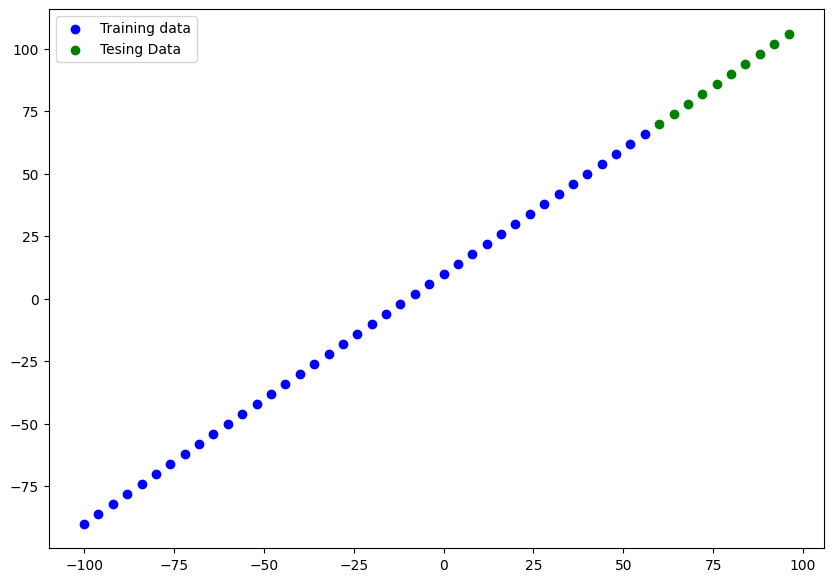

In [ ]:
plt.figure(figsize = (10,7))

plt.scatter(X_train , y_train , c='b', label = 'Training data')

plt.scatter(X_test, y_test, c='g', label = 'Tesing Data')

plt.legend()

In [ ]:
# Lets buid the model:
tf.random.set_seed(42)
# 1. creating a model:

Model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1],activation = 'relu', name = 'input_layer'),# Input_shape helps in automatically builing the model, even before fitting it.
    tf.keras.layers.Dense(1, name = 'output_layer')
])

#2. compliing the model:
Model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

### lets Visualize the modle befor we fir it:

In [ ]:
Model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Lets fit our model now:

Model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 30.3339 - mae: 30.3339
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 20.8671 - mae: 20.8671
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 14.9458 - mae: 14.9458
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 6.5293 - mae: 6.5293
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 12.5518 - mae: 12.5518
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.5501 - mae: 11.5501
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6617 - mae: 11.6617
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 12.0559 - mae: 12.0559
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 27.0604 - mae: 27.0604
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 14.0807 - mae: 14.0807
Epoch 11/100
2/2 [==============================] - 0s 7ms

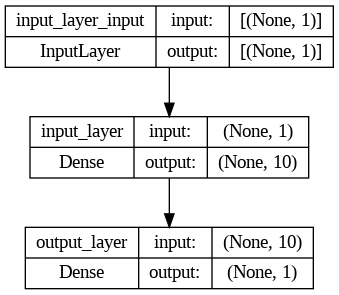

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = Model, show_shapes = True)

### Visualizing our models predictions:

To visualize predictions its good to plot against the actual values or the testing data.

In [ ]:
# Make some predictions:

y_pred = Model.predict(X_test)
y_pred

1/1 [==============================] - 0s 60ms/step


array([[56.670216],
       [60.396366],
       [64.12251 ],
       [67.84866 ],
       [71.574814],
       [75.300964],
       [79.027115],
       [82.75327 ],
       [86.479416],
       [90.20557 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Lets create a plotting functions:

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_lables = y_test,
                     predictions = y_pred):
  plt.figure(figsize = (10,7))

  plt.scatter(X_train, y_train, c= 'b', label = 'traing data')

  plt.scatter(X_test, y_test, c = 'g', label = 'testing data')

  plt.scatter(test_data, y_pred , c='r', label = 'predictions')

  plt.legend();


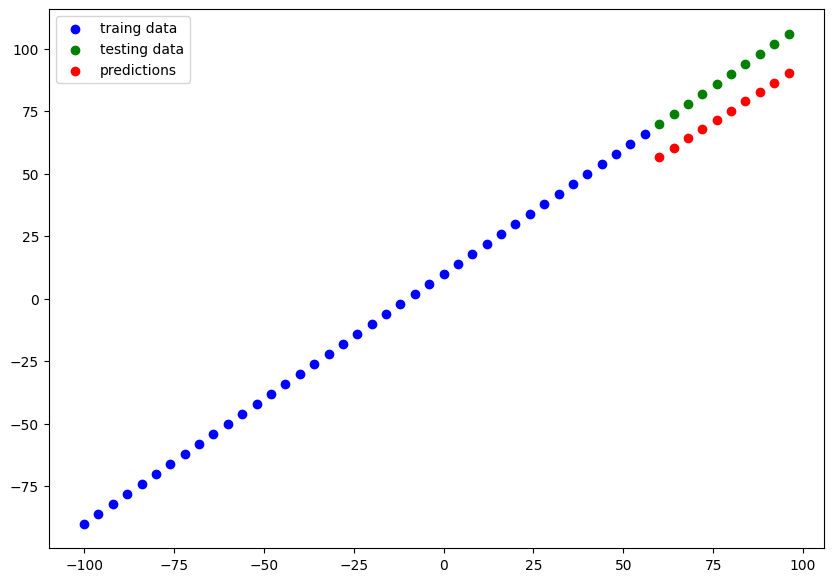

In [ ]:
plot_predictions(y_pred)

Lets Tweak our model and again print  the predictions:

In [ ]:
# Lets buid the model:
# 1. creating a model:

Model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape = [1],activation = 'relu', name = 'input_layer'),# Input_shape helps in automatically builing the model, even before fitting it.
    tf.keras.layers.Dense(100, activation = 'relu', name = 'first_layer'),
    tf.keras.layers.Dense(1, name = 'output_layer')
])

#2. compliing the model:
Model1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [ ]:
Model1.fit(X_train, y_train, epochs = 100, verbose = 0)

1/1 [==============================] - 0s 74ms/step


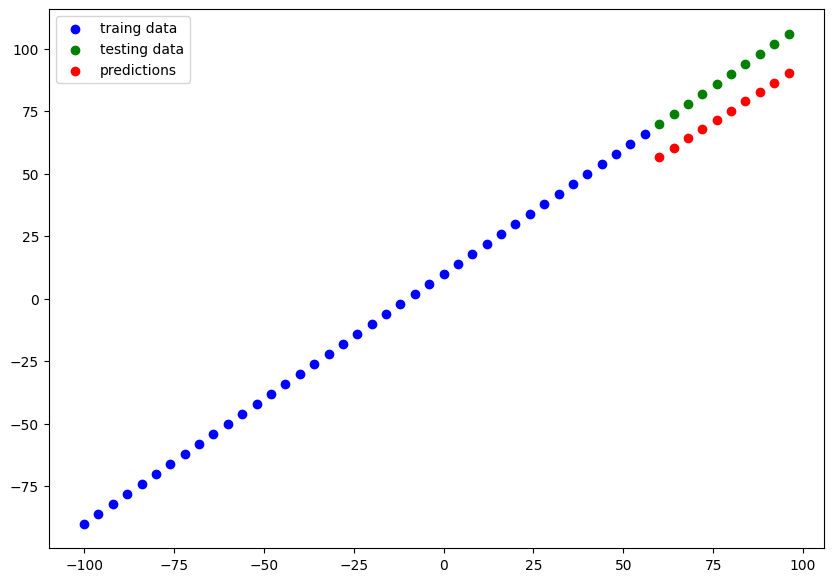

In [ ]:
y_newpreds = Model1.predict(X_test)
plot_predictions(y_newpreds)

### Evaluating our model with our metrics:

In [ ]:
# Evaluate the model on the test set:
Model1.evaluate(X_test,y_test)

1/1 [==============================] - 0s 163ms/step - loss: 44.2748 - mae: 44.2748


[44.27484893798828, 44.27484893798828]

In [ ]:
Model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 116ms/step - loss: 14.5621 - mae: 14.5621


[14.562110900878906, 14.562110900878906]

In [ ]:
# Lets build a function to calculate MAE and MSE:

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred=y_pred)
  
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = y_pred)

### Tracking the experiments:

we build multiple models with different parametres tweeked, inorder to choose the best one or to compare ecah one of them.
We have to track those experiments.

There are various toold to do so.

* **TENSORBOARD:** is one of them, it helps tracking the various experiments with interactive dashbords.

* **Weights&Biases** it is used to track all kinds of ML experiments.

## Saving our model:

Saving will help us use the model outside our notebok, whether in an application, website etc....

There are two main formats to save our model:

1. SaveModel format.
2. The HDF5 format

In [ ]:
# Save the modle with SaveModel.

Model.save('first_SavedModel')

In [ ]:
# Saving model with HDF5 format.

Model.save('second_Save_HDF5.h5')

## loading in the saved model:

In [ ]:
# Load in savemodel format:

loaded_saveModel_format = tf.keras.models.load_model('/content/first_SavedModel')

loaded_saveModel_format.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Comapre model prediction with saved model:

Model_preds = Model.predict(X_test)
loaded_saveModel_format_preds = loaded_saveModel_format.predict(X_test)

# Lets check for equality

Model_preds == loaded_saveModel_format_preds

1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 102ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Lets check the MAE:

mae(y_true = y_test, y_pred =Model_preds) == mae(y_true = y_test, y_pred =loaded_saveModel_format_preds)

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [ ]:
# Laoding the model in H5 format:

laoded_model_H5 = tf.keras.models.load_model('/content/second_Save_HDF5.h5')
laoded_model_H5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
laoded_model_H5_preds = laoded_model_H5.predict(X_test)
Model_Preds_ = Model.predict(X_test)


laoded_model_H5_preds == Model_Preds_

1/1 [==============================] - 0s 25ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any file) from Google Colab:

1. You can go to files tab, right click on the file and download.
2. Use code fromm below

In [ ]:
# download from colad:
from google.colab import files

files.download('/content/second_Save_HDF5.h5')

#This will download the saved file into our local machine.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## A LARGER EXAMPLE TO PUT IT ALL TOGETHER:

In [ ]:
# Import the required libraries:

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the kaggle file:

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Lets conver the non numerical columns to numeric:

insurance_oh = pd.get_dummies(insurance)

insurance_oh.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Lets create X (features) and y (target):

X = insurance_oh.drop('charges', axis = 1)
y = insurance_oh['charges']

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Lets create training and test sets:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [ ]:
# Lets build the neural network:
tf.random.set_seed(42)

# 1. Create the model:

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model:

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = 'mae')

# 3. Fit the model:

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 8760.2783 - mae: 8760.2783
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7878.9336 - mae: 7878.9336
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7543.0474 - mae: 7543.0474
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7736.5137 - mae: 7736.5137
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7660.6362 - mae: 7660.6362
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7642.3926 - mae: 7642.3926
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7586.2773 - mae: 7586.2773
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7801.7266 - mae: 7801.7266
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7607.2417 - mae: 7607.2417
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7658.6904 - mae: 7658.6904

In [ ]:
# Lets check the results:

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7642.3218 - mae: 7642.3218


[7642.32177734375, 7642.32177734375]

Right now model is performing poor, so lets improve the model by tweeking it.

1. Add and extra layer with more hidden units.

2. Train for more epochs.

In [ ]:
tf.random.set_seed(42)

# 1. building the model:

insurance_model_2 =  tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. complie the model:
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = 'mae' )

# 3. Fit the model:
insurance_model_2.fit(X_train, y_train , epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13302.4922 - mae: 13302.4922
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13132.5322 - mae: 13132.5322
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12778.5068 - mae: 12778.5068
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12082.7109 - mae: 12082.7109
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10924.4004 - mae: 10924.4004
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9459.8623 - mae: 9459.8623
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8138.1421 - mae: 8138.1421
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7520.6211 - mae: 7520.6211
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7424.1040 - mae: 7424.1040
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7404.4575 - mae:

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4868.2031 - mae: 4868.2031


[4868.203125, 4868.203125]

My second model is performing far better than the first one, just by adding the extra longer and changing the optimizer to ADAM.

In [ ]:
# Set random seed.

tf.random.set_seed(42)

# 1. create the model:

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model:

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = 'mae')

# 3. Fit the model:

history = insurance_model_3.fit(X_train,y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13289.3584 - mae: 13289.3584
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13133.4639 - mae: 13133.4639
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12803.2070 - mae: 12803.2070
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12149.9180 - mae: 12149.9180
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11046.6113 - mae: 11046.6113
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9614.7676 - mae: 9614.7676
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8273.0977 - mae: 8273.0977
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7575.8555 - mae: 7575.8555
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7448.0674 - mae: 7448.0674
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7426.9243 - mae:

In [ ]:
# Evalute the third model:

insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3504.7554 - mae: 3504.7554


[3504.75537109375, 3504.75537109375]

Text(0.5, 0, 'epochs')

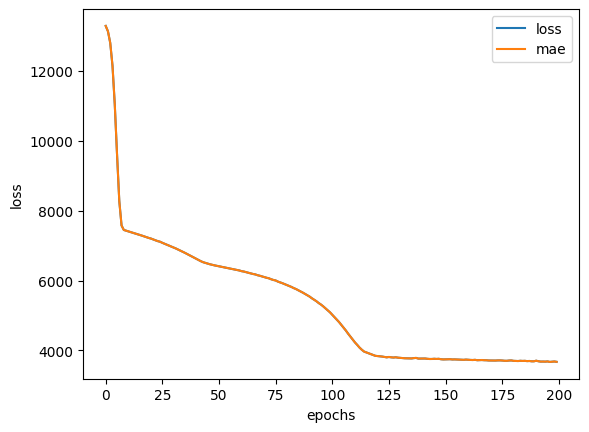

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Increasing the epochs has decreased the loss, question is how longer should we run??

* TensorFlow provides solution its called, **EarlyStopping Callback**.

## Preprocessing data (normalization and Standardization):

In terms of scaling values, NN tends to prefer the Normalization.

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
insurance_data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(handle_unknown = 'ignore'),['sex','smoker','region'])
)

#create X and y
X = insurance_data.drop('charges', axis = 1)
y = insurance_data['charges']

#train test split:

X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# Fit the column transformer to our training data.
ct.fit(X_train)

# Transform the training and testing data:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# what does our data look like now
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal.shape, X_test_normal.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

Our data has been normalized and onehot encoded, so now lets build a NN model.

In [ ]:
# Lets build the model:

tf.random.set_seed(42)

# 1. building the model:
new_insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compiling the model:
new_insurance_model.compile(loss = tf.keras.losses.mae,
                             optimizer = tf.keras.optimizers.Adam(),
                             metrics = 'mae')

#3. Fitting the model:
new_insurance_model.fit(X_train_normal, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 3s 2ms/step - loss: 13344.3008 - mae: 13344.3008
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13337.8848 - mae: 13337.8848
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13321.7568 - mae: 13321.7568
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13287.2939 - mae: 13287.2939
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13223.6377 - mae: 13223.6377
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13118.9766 - mae: 13118.9766
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12961.9111 - mae: 12961.9111
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12741.8018 - mae: 12741.8018
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12448.1738 - mae: 12448.1738
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 12072.69

In [ ]:
# Evaluating the new model;
new_insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 1s 8ms/step - loss: 3175.6104 - mae: 3175.6104


[3175.6103515625, 3175.6103515625]

Previous best model without normalizing:
9/9 [==============================] - 0s 1ms/step - loss: 3504.7554 - mae: 3504.7554
[3504.75537109375, 3504.75537109375]

If we compare our normalized model is performing better, thi shsows that normalizing further helps our NN to improve.